In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import odeint
from scipy.optimize import fixed_point, root_scalar

# 1 site, fixed-size fluctuation

In [303]:
def dX(X,t,  rhol, ml, v, D, beta):
    rho, m =X[0], X[1]
    drho=v*rhol + D*(rhol-rho)
    dm=v*ml+ D*(ml-m)+  2*rho*np.sinh(beta*m/rho)- 2*m*np.cosh(beta*m/rho)
    return([drho, dm])

In [354]:
def dX2D(X,t,  rhol, ml, v, D, beta):
    rho, m =X[0], X[1]
    drho=v*rhol + D*(3*rhol-4*rho)
    dm=v*ml+ D*(3*ml-4*m)+  2*rho*np.sinh(beta*m/rho)- 2*m*np.cosh(beta*m/rho)
    return([drho, dm])

In [304]:
def dX_lin(X,t,  rhol, ml, v, D, beta):
    rho, m =X[0], X[1]
    drho=v*rhol + D*(rhol-rho)
    dm=v*ml + D*(ml-m) + 2*m*(beta-1)- beta*beta*(1-beta/3)*m*m*m/(rho*rho)
    return([drho, dm])

In [305]:
def V(m, rho, D, v, beta, ml, rhol):
    return(-D*m*ml + 0.5*D*m*m - v*ml*m - 2*rho*rho*(1+beta)*np.cosh(beta*m/rho)/beta**2 + 2*m*rho*np.sinh(beta*m/rho)/beta)

In [306]:
def dV(m, rho, D, v, beta, ml, rhol):
    return(D*(ml-m)+ v*ml+ 2*rho*np.sinh(beta*m/rho)- 2*m*np.cosh(beta*m/rho))

In [365]:
rhol=6
ml=5
v=1
D=0.05
beta=2

In [376]:
rho0=20
m0=-20

vec_t=np.linspace(0, 100, 1000)
sol = odeint(func=dX, y0=[rho0, m0], t=vec_t, args=(rhol, ml, v, D, beta))
sol_lin = odeint(func=dX_lin, y0=[rho0, m0], t=vec_t, args=(rhol, ml, v, D, beta))
sol_2D = odeint(func=dX2D, y0=[rho0, m0], t=vec_t, args=(rhol, ml, v, D, beta))

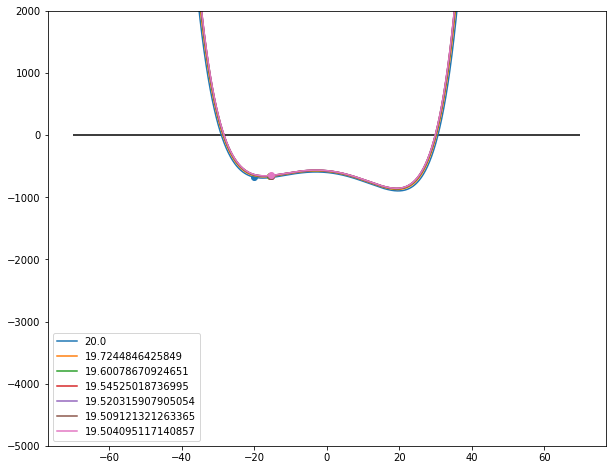

In [377]:
plt.figure(figsize=(10,8))
rho_t=sol_2D[:,0]
m_t=sol_2D[:,1]
vec_m=np.linspace(-70, 70, 1000)
plot_t=np.arange(0,130,20)
for (rho,m) in zip(rho_t[plot_t], m_t[plot_t]):
    p=plt.plot(vec_m, V(vec_m, rho, D, v, beta, ml, rhol), label=rho)
    c=p[0].get_color()
    plt.plot(m, V(m, rho, D, v, beta, ml, rhol), 'o', color=c)
    plt.ylim(-5000,2000)
    plt.legend()
plt.hlines(0, -70, 70)


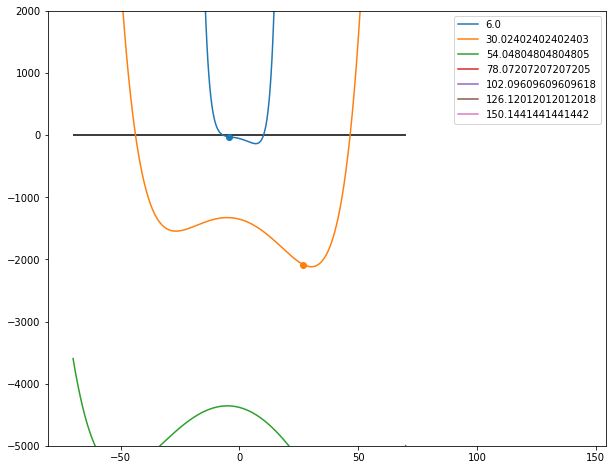

In [353]:
plt.figure(figsize=(10,8))
rho_t=sol[:,0]
m_t=sol[:,1]
vec_m=np.linspace(-70, 70, 1000)
plot_t=np.arange(0,130,20)
for (rho,m) in zip(rho_t[plot_t], m_t[plot_t]):
    p=plt.plot(vec_m, V(vec_m, rho, D, v, beta, ml, rhol), label=rho)
    c=p[0].get_color()
    plt.plot(m, V(m, rho, D, v, beta, ml, rhol), 'o', color=c)
    plt.ylim(-5000,2000)
    plt.legend()
plt.hlines(0, -70, 70)


Text(0.5, 1.0, 'MF expanded')

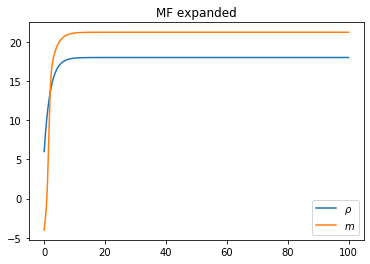

In [336]:
rho_t=sol_lin[:,0]
m_t=sol_lin[:,1]
plt.plot(vec_t, rho_t, label=r'$\rho$')
plt.plot(vec_t, m_t, label=r'$m$')
plt.legend()
plt.title('MF expanded')
#plt.ylim(-30,30)

Text(0.5, 1.0, 'MF expanded')

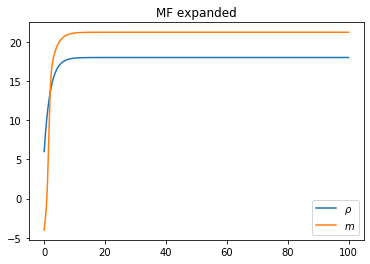

In [336]:
rho_t=sol_lin[:,0]
m_t=sol_lin[:,1]
plt.plot(vec_t, rho_t, label=r'$\rho$')
plt.plot(vec_t, m_t, label=r'$m$')
plt.legend()
plt.title('MF expanded')
#plt.ylim(-30,30)

Text(0.5, 1.0, 'MF')

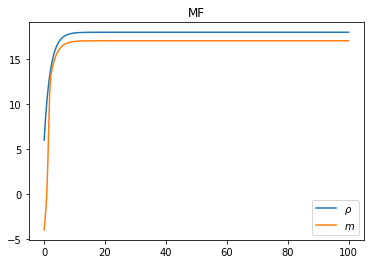

In [337]:
rho_t=sol[:,0]
m_t=sol[:,1]
plt.plot(vec_t, rho_t, label=r'$\rho$')
plt.plot(vec_t, m_t, label=r'$m$')
plt.legend()
plt.title('MF')

#plt.plot(vec_t, rhol+rhol*v/D-(v/D)*rhol*np.exp(-D*vec_t))

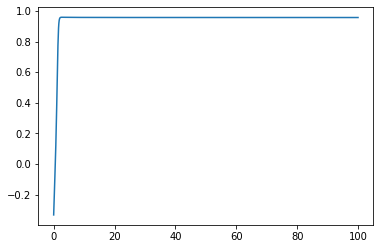

In [318]:
rho_t=sol[:,0]
m_t=sol[:,1]
plt.plot(vec_t, m_t/rho_t)

#plt.plot(vec_t, rhol+rhol*v/D-(v/D)*rhol*np.exp(-D*vec_t))

In [296]:
(m_t/rho_t)[-10:]

array([-0.95716239, -0.95716274, -0.95716308, -0.95716342, -0.95716377,
       -0.95716411, -0.95716445, -0.95716479, -0.95716513, -0.95716547])

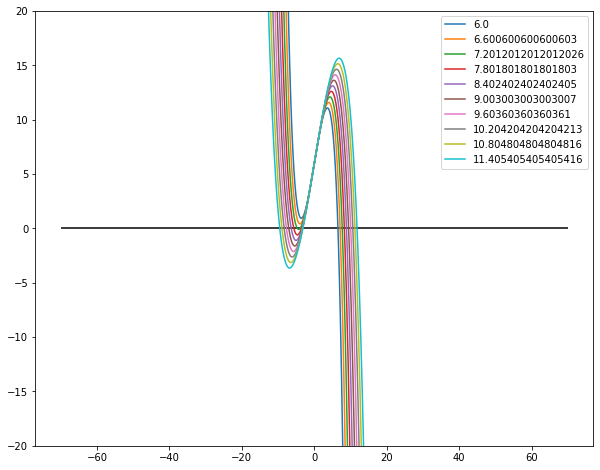

In [320]:
plt.figure(figsize=(10,8))
vec_m=np.linspace(-70, 70, 1000)
plot_t=np.arange(0,10,1)
for (rho,m) in zip(rho_t[plot_t], m_t[plot_t]):
 
    plt.plot(vec_m, D*(ml-vec_m)+ v*rhol+ 2*rho*np.sinh(beta*vec_m/rho)- 2*vec_m*np.cosh(beta*vec_m/rho), label=rho)
    #plt.vlines(m, -20, 20, linestyle='--')
    plt.ylim(-20,20)
    plt.legend()
plt.hlines(0, -70, 70)
#plt.vlines(m0, -20, 20)#, linestyle='o')

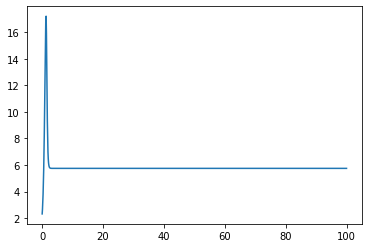

In [319]:
plt.plot(vec_t, dV(m_t, rho_t, D, v, beta, ml, rhol))

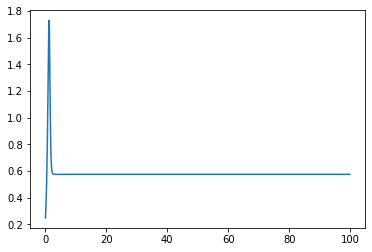

In [322]:
plt.plot(vec_t[:-1], np.diff(m_t))

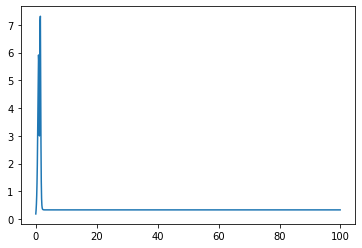

In [325]:
plt.plot(vec_t[:-1], np.diff(m_t)**2+np.diff(dV(m_t, rho_t, D, v, beta, ml, rhol))**2)

In [327]:
fixed_point(lambda x : np.tanh(beta*x), x0=0.5)

array(0.95750402)

In [464]:
rhol+ml*v/D

56.0

In [ ]:
def f_mf():
    rho0=20
    m0=-20

    vec_t=np.linspace(0, 100, 1000)
    sol = odeint(func=dX, y0=[rho0, m0], t=vec_t, args=(rhol, ml, v, D, beta))

# 1 site, fixed-size fluctuation, non-dimensional

In [625]:
def dX_adim(X,t, phi, gamma, beta):
    rho, m = X[0], X[1]
    drho = 1 + gamma*(1-rho)
    dm = phi + gamma*(phi-m) +  2*rho*np.sinh(beta*m/rho)- 2*m*np.cosh(beta*m/rho)
    return([drho, dm])

In [674]:
beta=2
phi=fixed_point(lambda x : np.tanh(beta*x), x0=0.5)
gamma=0.5

(-5, 5)

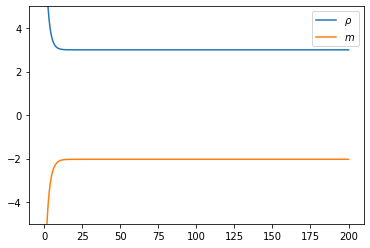

In [676]:
rho0=10
m0=-phi*rho0

vec_t=np.linspace(0, 200, 1000)
sol = odeint(func=dX_adim, y0=[rho0, m0], t=vec_t, args=(phi, gamma, beta))
rho_t=sol[:,0]
m_t=sol[:,1]
plt.plot(vec_t, rho_t, label=r'$\rho$')
plt.plot(vec_t, m_t, label=r'$m$')
plt.legend()
plt.ylim(-5,5)

In [741]:
2*np.sinh(beta*phi) - 2*phi*np.cosh(beta*phi)

0.0

In [745]:
1/(gamma*phi)

0.3481273445869445

In [677]:
def f_gammac(gamma, rho0, beta, phi):
    vec_t=np.linspace(0, 100, 1000)
    m0=-phi*rho0
    sol = odeint(func=dX_adim, y0=[rho0, m0], t=vec_t, args=(phi, gamma, beta))
    m_t=sol[:,1]

In [465]:
def f_mf(rho0, beta, phi, gamma):
    vec_t=np.linspace(0, 100, 1000)
    m0=-phi*rho0
    sol = odeint(func=dX_adim, y0=[rho0, m0], t=vec_t, args=(phi, gamma, beta))
    m_t=sol[:,1]
    return(m_t[-1])

In [476]:
f_mf(rho0=20, beta=2, phi=phi, gamma=0.6)

2.5533440642038023

In [550]:
root_scalar(f_mf, args=(2, phi, 0.555), method='bisect', bracket=[0.1, 2000])

      converged: True
           flag: 'converged'
 function_calls: 52
     iterations: 50
           root: 2.4730537758222937

In [544]:
list_gamma=np.linspace(0, 0.55, 20)
list_rhostar=[]

for gamma in list_gamma:
    print(gamma)
    list_rhostar.append(root_scalar(f_mf, args=(2, phi, gamma), method='bisect', bracket=[0.1, 50]).root)

0.0
0.028947368421052635
0.05789473684210527
0.0868421052631579
0.11578947368421054
0.14473684210526316
0.1736842105263158
0.20263157894736844
0.23157894736842108
0.2605263157894737
0.2894736842105263
0.318421052631579
0.3473684210526316
0.37631578947368427
0.4052631578947369
0.43421052631578955
0.46315789473684216
0.49210526315789477
0.5210526315789474
0.55


In [746]:
gamma

3

In [747]:
2*(beta-1)

2

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


(0, 3)

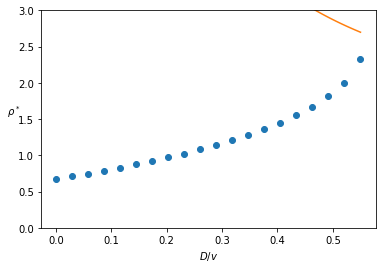

In [740]:
plt.plot(list_gamma, list_rhostar, 'o')
plt.xlabel(r'$D/v$')
plt.ylabel(r'$\rho^*$', rotation=0)

tau=0.7
abs_g=np.linspace(0,0.55,100)
#plt.plot(abs_g, -tau*(1+abs_g)/(abs_g*tau-1))
#plt.plot(abs_g, (1+abs_g)/(-abs_g+2*(beta-1)))
plt.plot(abs_g, phi*(1+abs_g)/abs_g)
plt.ylim(0,3)

# 1 site, variable width fluctuation, non-dimensional (1)

In [920]:
def dX_adim_lin(X,t, phi, gamma, beta):
    rho, m = X[0], X[1]
    drho = 1 + gamma*(1-rho)
    dm = phi + gamma*(phi-m) + 2*m*(beta-1)*np.sqrt(2*gamma*t)
    return([drho, dm])

In [926]:
def dX_adim_lin(X,t, phi, gamma, beta):
    rho, m = X[0], X[1]
    drho = 1 + gamma*(1-rho)
    dm = phi + gamma*(phi-m) + np.sqrt(2*gamma*(t+1))*(2*rho*np.sinh(beta*m/rho)- 2*m*np.cosh(beta*m/rho))
    return([drho, dm])

2.1


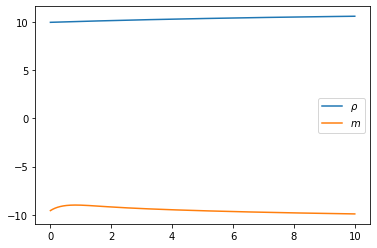

In [939]:
beta=2
phi=fixed_point(lambda x : np.tanh(beta*x), x0=0.5)
gamma=0.1
print(2*(beta-1)+gamma)

rho0=10
m0=-phi*rho0

vec_t=np.linspace(0, 10, 1000)
sol = odeint(func=dX_adim_lin, y0=[rho0, m0], t=vec_t, args=(phi, gamma, beta))
rho_t=sol[:,0]
m_t=sol[:,1]
plt.plot(vec_t, rho_t, label=r'$\rho$')
plt.plot(vec_t, m_t, label=r'$m$')
plt.legend()
#plt.ylim(-10,10)

In [928]:
def f_mf_adim_lin(rho0, beta, phi, gamma):
    vec_t=np.linspace(0, 10, 1000)
    m0=-phi*rho0
    sol = odeint(func=dX_adim_lin, y0=[rho0, m0], t=vec_t, args=(phi, gamma, beta))
    m_t=sol[:,1]
    return(m_t[-1])

In [929]:
f_mf_adim_lin(rho0=20, beta=2, phi=phi, gamma=0.6)

-2.431662301229075

In [930]:
root_scalar(f_mf_adim_lin, args=(2, phi, 0.8), method='bisect', bracket=[0.1, 2000])

      converged: True
           flag: 'converged'
 function_calls: 52
     iterations: 50
           root: 1.2610067416583364

In [1009]:
list_gamma=np.linspace(0.01, 2, 20)
list_rhostar=[]

for gamma in list_gamma:
    print(gamma)
    list_rhostar.append(root_scalar(f_mf_adim_lin, args=(2, phi, gamma), method='bisect', bracket=[0.1, 1000]).root)

0.01
0.11473684210526315
0.21947368421052632
0.3242105263157895
0.42894736842105263
0.5336842105263158
0.638421052631579
0.7431578947368421
0.8478947368421053
0.9526315789473684
1.0573684210526315
1.1621052631578948
1.266842105263158
1.371578947368421
1.4763157894736842
1.5810526315789473
1.6857894736842105
1.7905263157894737
1.8952631578947368
2.0


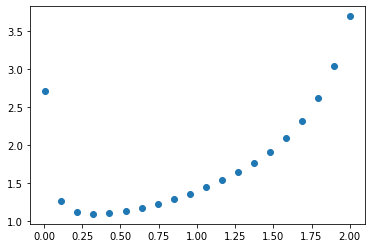

In [1010]:
plt.plot(list_gamma, list_rhostar, 'o')

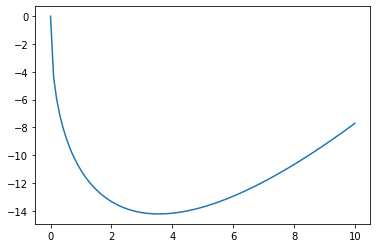

In [1004]:
t0=2
t_c=1

vec_gamma=np.linspace(0,10, 100)
#plt.plot(vec_gamma, np.exp(2*(beta-1)*((2/3)*t0*np.sqrt(2*vec_gamma*t0)-vec_gamma*t0))*(t_c*phi-1+vec_gamma)/phi)

u=2
plt.plot(vec_gamma, -2*(beta-1)*((2/3)*(u+t0)**(3/2)*np.sqrt(2*vec_gamma)-vec_gamma*u))

# 1 site, variable width fluctuation, non-dimensional (2)

In [920]:
def dX_adim_2(X,t, phi, gamma, beta, c):
    rho, m = X[0], X[1]
    drho = c - phi + gamma - 2*gamma*rho/np.sqrt(2*gamma*t)
    dm = c*phi - 1 + gamma*phi -2*gamma*m/np.sqrt(2*gamma*t)+ 2*m*(beta-1)*np.sqrt(2*gamma*t)
    return([drho, dm])

In [3]:
def dX_adim_2(X, t, phi, gamma, beta, c):
    rho, m = X[0], X[1]
    drho = c - phi + gamma - 2*gamma*rho/np.sqrt(2*gamma*(t))
    dm = c*phi - 1 + gamma*phi - 2*gamma*m/np.sqrt(2*gamma*(t))+  2*rho*np.sinh(beta*m/rho)- 2*m*np.cosh(beta*m/rho)
    return([drho, dm])

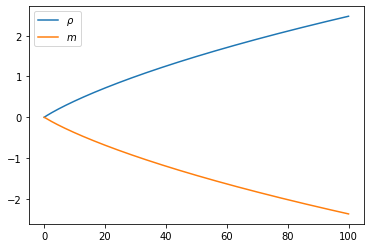

In [14]:
beta=2
c=1
phi=fixed_point(lambda x : np.tanh(beta*x), x0=0.5)
gamma=0.01

rho0=0.0001
m0=-phi*rho0

vec_t=np.linspace(0.0001, 100, 1000)
sol = odeint(func=dX_adim_2, y0=[rho0, m0], t=vec_t, args=(phi, gamma, beta, c))
rho_t=sol[:,0]
m_t=sol[:,1]
plt.plot(vec_t, rho_t, label=r'$\rho$')
plt.plot(vec_t, m_t, label=r'$m$')
plt.legend()
#plt.ylim(-10,10)

In [5]:
def f_mf_adim_2(rho0, beta, phi, gamma, c):
    vec_t=np.linspace(0.001, 10, 1000)
    m0=-phi*rho0
    sol = odeint(func=dX_adim_2, y0=[rho0, m0], t=vec_t, args=(phi, gamma, beta, c))
    m_t=sol[:,1]
    return(m_t[-1])

In [6]:
f_mf_adim_2(rho0=0.0000001, beta=2, phi=phi, gamma=0.01, c=1)

-0.3780452132209866

In [8]:
list_gamma=np.linspace(0.05, 1, 20)
list_rhostar_2=[]

for gamma in list_gamma:
    print(gamma)
    list_rhostar_2.append(root_scalar(f_mf_adim_2, args=(2, phi, gamma, c), method='bisect', bracket=[0.0001, 1000]).root)

0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.6
0.65
0.7
0.75
0.7999999999999999
0.85
0.9
0.95
1.0


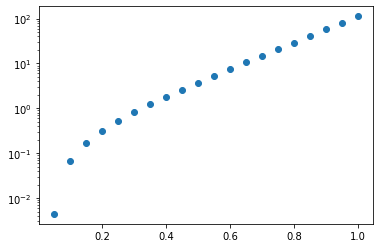

In [11]:
plt.semilogy(list_gamma, list_rhostar_2, 'o')

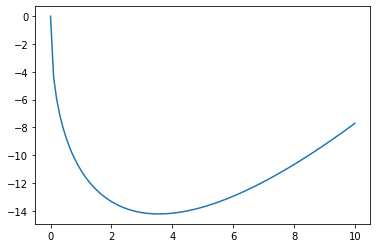

In [1004]:
t0=2
t_c=1

vec_gamma=np.linspace(0,10, 100)
#plt.plot(vec_gamma, np.exp(2*(beta-1)*((2/3)*t0*np.sqrt(2*vec_gamma*t0)-vec_gamma*t0))*(t_c*phi-1+vec_gamma)/phi)

u=2
plt.plot(vec_gamma, -2*(beta-1)*((2/3)*(u+t0)**(3/2)*np.sqrt(2*vec_gamma)-vec_gamma*u))